피드백

A.    단순빈도수에 더해 TF-IDF 빈도수를 쓴다면?

B.    메타 데이터별 빈도수 분석은 별로 였나?

C.    영어 불용어(to 같은 전치사 지우기?)

D.    DMR 분석은 메타데이터별 비중 퍼센트가 나오면 좋을 듯

E.    이모지는 주요 이모지만 텍스트화?

F.    스몰 데이터에 맞는 질적 해석을 마지막 결론으로 넣어도 좋을 듯

G.    위 의견과 관련돼 연구자가 직접 데이터를 모으며 텍스트를 읽은 경험을 데이터와 같이 녹이면 좋은 연구가 될 것

H.    틴더 광고와의 연수 학생의 결론을 잇는다면?


pandas cheat sheet https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

## 라이브러리 로드

In [ ]:
# !pip install konlpy
# !pip install PyKomoran # 코모란
!pip install tomotopy # 토픽 모델링
!pip install kiwipiepy # 키위
!pip install chatspace  # 띄어쓰기 교정 - 대화형의 스페이스
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!sudo apt update # 최신 팩키지로 업데이트
!sudo apt install fonts-nanum #나눔폰트 설치
!curl https://raw.githubusercontent.com/lovit/soyspacing/master/demo_model/134963_norm.txt -o 134963_norm.txt #soyspacing 학습
!pip install regex


import pandas as pd # 판다스
import numpy as np
import matplotlib.pyplot as plt # 그래프 모듈

from sklearn.feature_extraction.text import CountVectorizer # 문서 내 단어 수를 세서 벡터로 만들어주는 모듈
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import sys
import regex

import tomotopy as tp
# print(tp.isa)

from kiwipiepy import Kiwi, Option
kiwi = Kiwi(options=Option.DEFAULT)
kiwi.prepare()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
49 packages can be upgraded. Run 'apt

0

In [ ]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# import logging
# logging.basicConfig(
#     format='%(asctime)s : %(levelname)s : %(message)s', 
#     level=logging.INFO)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# plt.rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
!apt install fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


## 표 다듬기

데이터 읽어오기 및 확인


특정 단어 있는 행 뽑음 : df[df[col_name].str.contains(word, na=False)]

In [ ]:
df = pd.read_excel('틴더_연구데이터.xlsx')

In [ ]:
# 결측행 제거
# df = df.dropna(subset=['문구'])
# df = df.dropna(subset=['유저네임'])

# 인덱스 초기화
# df = df.reset_index(drop=True)

# 칼럼 삭제 및 칼럼명 변경
df = df.drop(['종교', '거리 및 지역', '비고'], axis=1)
df = df.rename({'성별':'gender', '작성일자':'date', '유저네임':'name', '나이':'age', '문구':'profile','직업':'job', '학교':'school','해시태그':'hashtag', '외국인 여부':'alien'}, axis = 1)

남녀 나이 평균

In [ ]:
ages = df.groupby('gender').age.mean()

In [ ]:
ages

gender
남    26.145098
여    22.665179
Name: age, dtype: float64

# 텍스트 전처리

## 종류가 다른 문자들(한글, 이모지, 알파벳)

In [ ]:
# 이모지 모듈

!pip install emoji
import emoji

In [ ]:
# profile을 string으로 바꾸고, 이모지를 alphabet으로 바꾸기

df['profile'] = df['profile'].apply(lambda x: str(x))
df['profile'] = df['profile'].apply(lambda x: emoji.demojize(x))

In [ ]:
# 열 안에서 특정 값을 뭐시기로 바꾸기
# df['가격'] = df['가격'].astype(str).str.replace('원', '')

In [ ]:
# 한글만 별도 탭(profile_hangul)에 옮기기
# df['profile_hangul'] = df['profile'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# df = df.dropna(subset=['profile_hangul'])
# df = df.reset_index(drop=True)
# df['profile_hangul']

 ***질문1. 영어를 띄어쓰기 해주는 모듈이 있나요? 너무 번거로운 작업이라면 포기하고 한글 문구만 분석하려고 합니다!!***

In [ ]:
# 영어만 별도 탭(profile_aphabet)에 옮기기
# demojize된 이모지도 포함됨
# df['profile_alphabet'] = df['profile'].str.replace("[^A-Za-z]","") 
# df = df.dropna(subset=['profile_alphabet'])
# df = df.reset_index(drop=True)
# df['profile_alphabet']

## 한글 처리 및 토큰화

In [ ]:
# chatspace로 띄어쓰기
from chatspace import ChatSpace

spacer = ChatSpace()
# df['profile_hangul'] = spacer.space(df['profile_hangul'])

Loading JIT Compiled ChatSpace Model


In [ ]:
df.loc[df['hashtag'].isna(),'hashtag'] = ''

In [ ]:
df['hashtag']

0          심심할 때 수다, 근교 드라이브, 반려동물과 산책, 술 한 잔
1                    코노 메이트, 술 한 잔, 새로운 것 배우기
2                                            
3                                            
4                                            
                        ...                  
494                  새로운 것 배우기, 커피 한 잔, 동네 산책
495                                          
496    근교 드라이브, 심심할 때 수다, 인스타 감성 카페투어, 코노 메이트
497           동네 산책, 영화 감상, 한강에서 치맥, 심심할 때 수다
498                                          
Name: hashtag, Length: 499, dtype: object

In [ ]:
df['text'] =df['profile'].astype(str) + ' ' + df['hashtag'].astype(str)

In [ ]:
# df['text'] = spacer.space(df['text'])

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df['text']

0      일이 많이 바빠서 답이 느릴 때가 있어요..! 심심할 때 수다, 근교 드라이브, 반...
1            출장땜에 잠시 지방에 내려가있어요 코노 메이트, 술 한 잔, 새로운 것 배우기
2      doctor of dental surgery\nneither married nor ...
3      :france: french living in 서울\ni can't lick my ...
4                                                   nan 
                             ...                        
494    ons, fwb -> go to hell and fuck off\njust wann...
495                  감성이 맞는 남자 \n타투 있어\nyoutube - aneui 
496    ig \n연하 좋아 어릴수록 더 좋아\n연애할 사람 찾는 중\n술 :cross_ma...
497    출근하자마자 집에 가고 싶은 나이\n늘 살을 빼고 있긴 한데 쉽지 않은 나이\n그래...
498      서울 사는 직장인\nno fwb non smoker\n165 cm\n동네 친구 환영 
Name: text, Length: 499, dtype: object

In [ ]:
df.loc[df['text'].isna(),'text'] = ''

In [ ]:
df['text'] = df['text'].astype(str).str.replace('\n', ' ')
df['text'] = df['text'].astype(str).str.replace("'", '')

In [ ]:
# 불용어 리스트
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', 'and', '있다', 's', 'to', 'ing', 'but', 'a', 'in', 'nan','on','at','mark']

In [ ]:
# 토크나이징 함수 선언
def tokenize(sent, debug=False):
    res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
    ret = []
    if debug:
      print(res)
    for word, tag, _, _ in res:
        # 조사, 어미, 특수기호 및 stopwords에 포함된 단어는 제거
        if (not tag.startswith('E') and
            not tag.startswith('J') and
            not tag.startswith('SF') and
            not tag.startswith('SP') and
            not tag.startswith('SS') and
            not tag.startswith('SE') and
            not tag.startswith('SO') and
            not tag.startswith('SN') and
            not tag.startswith('SW') and
            word not in stopwords):
          ret.append(word + ('다' if tag.startswith('V') else ''))
    return ret

In [ ]:
kiwi = Kiwi() # kiwi 형태소 분석기 재실행
kiwi.add_user_word('fwb','NNP')
kiwi.add_user_word('여사친','NNP')
kiwi.add_user_word('남사친','NNP')
kiwi.add_user_word('instagram','NNP')
kiwi.add_user_word('방탈출','NNP')
kiwi.add_user_word('bts','NNP')
kiwi.add_user_word('무한도전','NNP')
kiwi.add_user_word('롯데월드','NNP')
kiwi.add_user_word('ons','NNP')
kiwi.add_user_word('왓챠','NNP')
kiwi.add_user_word('edm','NNP')
kiwi.add_user_word('hmu','NNP')
kiwi.add_user_word('밀당','NNP')
kiwi.add_user_word('배그','NNP')
kiwi.add_user_word('서든','NNP')
kiwi.add_user_word('롤','NNP')
kiwi.add_user_word('칼답','NNP')
kiwi.add_user_word('치맥','NNP')
kiwi.add_user_word('썸','NNP')
kiwi.add_user_word('istj','NNP')
kiwi.add_user_word('isfj','NNP')
kiwi.add_user_word('infj','NNP')
kiwi.add_user_word('intj','NNP')
kiwi.add_user_word('istp','NNP')
kiwi.add_user_word('isfp','NNP')
kiwi.add_user_word('infp','NNP')
kiwi.add_user_word('intp','NNP')
kiwi.add_user_word('estp','NNP')
kiwi.add_user_word('esfp','NNP')
kiwi.add_user_word('enfp','NNP')
kiwi.add_user_word('entp','NNP')
kiwi.add_user_word('estj','NNP')
kiwi.add_user_word('esfj','NNP')
kiwi.add_user_word('enfj','NNP')
kiwi.add_user_word('entj','NNP')
kiwi.add_user_word('cm','NNP')
kiwi.add_user_word('dm','NNP')
kiwi.add_user_word('youtube','NNP')
kiwi.add_user_word('반려동물','NNP')
kiwi.add_user_word('crossmark','NNP')
kiwi.add_user_word('말','NNG')
kiwi.add_user_word('연하','NNG')
kiwi.add_user_word('연상','NNG')
kiwi.prepare()

0

In [ ]:
kiwi.analyze('인스타그램')

[([('인스타그램', 'NNP', 0, 5)], -9.896484375)]

In [ ]:
df['token'] = df['text'].map(lambda x:tokenize(x))

동의어 처리 및 불용어

In [ ]:
stopwords = ['으로','하다', 'and', '있다', 's', 'to', 'ing', 'but', 'a', 'in', 'the', '탐방','so', 'am', 'or', 'gesturing', 'if', '투어', 'it', 'm', 'for', 'south', 'from', 'united', '경기', '관람','me','my','nor', 'of', '이다','감상','근교','도장','깨다']
# 어차피 한 글자라서 빠질 것들 '의','가','이','은','들','는','좀','잘','걍','과','도','를','에','와','한',,'자'

In [ ]:
df['token'] = df['token'].map(lambda x:[w for w in x if not w in stopwords]) 

In [ ]:
# 동의어 사전
# origin word : new word
synonym_dict = {
    '한국당' : '자유한국당',
    'please' : 'plz',
    'instagram' : '인스타',
    'insta':'인스타',
    '인스타' : '인스타그램',
    'ig' : '인스타',
    'tattoo' : 'tattoos',
    '반려동물':'애완동물',
    'cant':'cannot',
    'srsly':'seriously',
    'kingdom':'british',
    'parties':'party',
    'im' : 'i',
    'cross':'no'
}

In [ ]:
def multipleReplace(text, wordDict):
    for key in wordDict:
        text = text.replace(key, wordDict[key])
    return text

In [ ]:
# 동의어 처리
df['token'] = df['token'].map(lambda x:multipleReplace(','.join(x),synonym_dict).split(','))

In [ ]:
df[df['text'].str.contains("tie", na=False)]

,Unnamed: 0,date,name,age,gender,profile,job,school,hashtag,alien,text,token
106,107,2020.05.30,Florian,23.0,남,MBA Exchange Student\nFrom Duesseldorf :German...,NaN,Korea University,"running, chef, parties, crossfit, skier",외국인,mba exchange student from duesseldorf :germany...,"[mba, exchange, student, duesseldorf, germany,..."
173,174,2020.05.31.,Minji,21.0,여,I don't use Tinder.\nInstagram,NaN,University of Southern California,"fashion, model, movies, music, parties",NaN,"i dont use tinder. instagram fashion, model, ...","[i, dont, use, tinder, 인스타그램, fashion, model, ..."
187,188,2020.05.31.,Celina,23.0,여,:South_Korea::United_States:,NaN,NaN,"nature, parties, camping, music, concerts",NaN,":south_korea::united_states: nature, parties, ...","[korea, states, nature, party, camping, music,..."
240,241,NaN,Gage,23.0,남,my home is the last pic.,US army,oklahoma state university,"parties, cars, anime, gamer, military",NaN,"my home is the last pic. parties, cars, anime...","[home, is, last, pic, party, cars, anie, gamer..."
304,305,NaN,NaN,19.0,여,I'm just trying to enjoy my last few months in...,NaN,NaN,"tattoos, nightlife, parties, nature",NaN,im just trying to enjoy my last few months in ...,"[i, just, trying, enjoy, last, few, months, ko..."
314,315,NaN,NaN,19.0,여,let's stop wasting our youth,NaN,NaN,"festivals, music, concerts, parties, designer",NaN,"lets stop wasting our youth festivals, music, ...","[lets, stop, wasting, our, youth, festivals, m..."
338,339,NaN,NaN,18.0,여,send me ur snap if we match,NaN,NaN,"420friendly, drinker, smoker, parties",NaN,"send me ur snap if we match 420friendly, drin...","[send, ur, snap, we, match, friendly, drinker,..."


In [ ]:
df['text'][338]

'send me ur snap if we match  420friendly, drinker, smoker, parties'

1음절 삭제

In [ ]:
hangul_1 = regex.compile(r'^\p{Hangul}{1}$')

In [ ]:
# '일' or '돈' 이라는 1음절 단어는 살리고 싶다면?
hangul_1_except = regex.compile(r'^(?!일|돈|키|술|겜|썸|롤|살|답|몸|밥|나|저|너)\p{Hangul}{1}$')

In [ ]:
df['token'].map(lambda x:[w for w in x if not hangul_1_except.match(w)])

0        [일, 많이, 바쁘다, 답, 느리다, 심심, 수다, 드라이브, 애완동물, 산책, 술]
1                   [출장, 잠시, 지방, 내려가다, 메이트, 술, 새롭다, 배우다]
2      [doctor, dental, surgery, neither, married, en...
3      [france, french, living, 서울, i, cannot, lick, ...
4                                                     []
                             ...                        
494    [ons, fwb, go, hell, fuck, off, just, wanna, t...
495                     [감성, 맞다, 남자, 타투, youtube, aneui]
496    [인스타, 연하다, 좋아, 어리다, 좋아, 연애, 사람, 찾다, 술, no, int...
497    [출근, 싶다, 나이, 살, 빼다, 쉽다, 않다, 나이, 그래서, 어쩌라고, 싶다,...
498    [서울, 살다, 직장인, no, fwb, non, smoker, cm, 동네, 친구...
Name: token, Length: 499, dtype: object

In [ ]:
df['token'] = df['token'].map(lambda x:[w for w in x if not hangul_1_except.match(w)])

In [ ]:
df['token']

0        [일, 많이, 바쁘다, 답, 느리다, 심심, 수다, 드라이브, 애완동물, 산책, 술]
1                   [출장, 잠시, 지방, 내려가다, 메이트, 술, 새롭다, 배우다]
2      [doctor, dental, surgery, neither, married, en...
3      [france, french, living, 서울, i, cannot, lick, ...
4                                                     []
                             ...                        
494    [ons, fwb, go, hell, fuck, off, just, wanna, t...
495                     [감성, 맞다, 남자, 타투, youtube, aneui]
496    [인스타, 연하다, 좋아, 어리다, 좋아, 연애, 사람, 찾다, 술, no, int...
497    [출근, 싶다, 나이, 살, 빼다, 쉽다, 않다, 나이, 그래서, 어쩌라고, 싶다,...
498    [서울, 살다, 직장인, no, fwb, non, smoker, cm, 동네, 친구...
Name: token, Length: 499, dtype: object

In [ ]:
df['text'][494]

'ons, fwb -> go to hell and fuck off just wanna talk about new topics and meet some new friends more or less 멀쩡하게 돈 벌고 잘 먹고 잘 사는 그냥 사람 원래 사람 구경이 제일 재밌잖아요 카톡으로 넘어가자고 하기 전에 목적을 밝히세요 앞뒤 다른 사람은 그런 사람끼리 만났으면 새로운 것 배우기, 커피 한 잔, 동네 산책'

## 한글 토큰의 단순 빈도수

In [ ]:
tf_vectorizer = CountVectorizer(analyzer='word',
                             lowercase=False,
                             tokenizer=None,
                             preprocessor=None,
                             min_df=2,
                             )

In [ ]:
tf_vector = tf_vectorizer.fit_transform(df['token'].astype(str))

In [ ]:
# 빈도수 내림차순으로 정렬
tf_scores = tf_vector.toarray().sum(axis=0)
tf_idx = np.argsort(-tf_scores)
tf_scores = tf_scores[tf_idx]
tf_vocab = np.array(tf_vectorizer.get_feature_names())[tf_idx]

# 상위 50개 단어
print(list(zip(tf_vocab, tf_scores))[:50])

[('산책', 131), ('커피', 120), ('심심', 118), ('대화', 107), ('영화', 106), ('동네', 99), ('수다', 99), ('솔직', 92), ('카페', 84), ('사람', 79), ('여행', 76), ('친구', 69), ('한강', 69), ('치맥', 68), ('스타', 63), ('드라이브', 59), ('감성', 56), ('korea', 55), ('좋아하다', 55), ('교환', 54), ('언어', 53), ('전시회', 52), ('배우다', 48), ('새롭다', 48), ('fwb', 45), ('no', 40), ('you', 40), ('애완동물', 35), ('korean', 33), ('인스타그램', 32), ('쇼핑', 31), ('friends', 30), ('music', 29), ('메이트', 28), ('피씨방', 28), ('english', 27), ('cm', 25), ('not', 25), ('운동', 24), ('주다', 23), ('보다', 23), ('좋다', 22), ('with', 22), ('love', 21), ('인스타', 21), ('like', 21), ('찾다', 20), ('seoul', 20), ('스포츠', 19), ('같이', 19)]


# 1. 프로필 문구: DMR 토픽 모델링

## 나이 범주화 (연속의 수치형 값을 범주형 값으로)


https://blog.naver.com/youji4ever/221671830297

수치 범위 구간을 직접 지정해서 레이블링한다.



In [ ]:
df['age_band'] = 0

In [ ]:
df.loc[df['age'] < 30, 'age_band'] = ' 20대 이하'
df.loc[df['age']  >= 30, 'age_band'] = '30대 이상'
df['age_band'].value_counts()

 20대 이하    403
30대 이상      76
0           20
Name: age_band, dtype: int64

In [ ]:
idx_nm_1 = df[df['age_band'] == 0].index
df = df.drop(idx_nm_1)

In [ ]:
df['gender']

0      남
1      남
2      남
3      남
4      남
      ..
494    여
495    여
496    여
497    여
498    여
Name: gender, Length: 479, dtype: object

In [ ]:
#  TypeError: must be str, not float 떠서 추가(21:30)
df['age_band'] = df['age_band'].apply(lambda x: str(x))
df['gender'] = df['gender'].apply(lambda x: str(x))
df['age_gender'] = df.apply(lambda x:x['age_band']+' '+x['gender'],axis=1) # 나이대+성별

## 메타데이터 **성별** 

- 남
- 여


In [ ]:
df['age_band'][df['gender']=='남'].value_counts()

 20대 이하    208
30대 이상      47
Name: age_band, dtype: int64

In [ ]:
df['age_band'][df['gender']=='여'].value_counts()

 20대 이하    195
30대 이상      29
Name: age_band, dtype: int64

In [ ]:
!pip install tqdm
from tqdm import tqdm
tqdm.pandas()

In [ ]:
DMR_model = tp.DMRModel(k=4,min_cf=5,tw=tp.TermWeight.IDF,rm_top=5)

In [ ]:
token_gender_dict = df[['token','gender']].to_dict('index')
for k in tqdm(token_gender_dict.keys()):
    DMR_model.add_doc(token_gender_dict[k]['token'],token_gender_dict[k]['gender'])

100%|██████████| 479/479 [00:00<00:00, 61355.07it/s]


In [ ]:
DMR_model.train(0)

In [ ]:
# 한번에 20회씩 총 500회 학습
print('Num docs:', len(DMR_model.docs), ', Vocab size:', DMR_model.num_vocabs, ', Num words:', DMR_model.num_words)
print('Removed top words:', DMR_model.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 500, 20):
    DMR_model.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, DMR_model.ll_per_word))

Training...


Num docs: 478 , Vocab size: 219 , Num words: 3484
Removed top words: ['술', 'i', '산책', '커피', '심심']
Iteration: 0	Log-likelihood: -18.204541125934654
Iteration: 20	Log-likelihood: -17.899870810429345
Iteration: 40	Log-likelihood: -17.71690963668028
Iteration: 60	Log-likelihood: -17.647620909634536
Iteration: 80	Log-likelihood: -17.568110427253554
Iteration: 100	Log-likelihood: -17.510165409784847
Iteration: 120	Log-likelihood: -17.52836810888126
Iteration: 140	Log-likelihood: -17.51994257235534
Iteration: 160	Log-likelihood: -17.51659542974833
Iteration: 180	Log-likelihood: -17.518040675562982
Iteration: 200	Log-likelihood: -17.52360062168571
Iteration: 220	Log-likelihood: -17.536049756575398
Iteration: 240	Log-likelihood: -17.539100503974545
Iteration: 260	Log-likelihood: -17.54397416969357
Iteration: 280	Log-likelihood: -17.516092197278816
Iteration: 300	Log-likelihood: -17.511870528600177
Iteration: 320	Log-likelihood: -17.51240676330952
Iteration: 340	Log-likelihood: -17.4963871234713

In [ ]:
for i in range(DMR_model.k):
    res = DMR_model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	you, korea, korean, friends, music, not, english, like, with, seoul
Topic #1	woman, 주말, no, ons, fwb, 사람, 만나다, 보다, 찾다, 솔직
Topic #2	생각, 만나다, , 않다, 가볍다, 되다, talk, you, 편하다, 드라이브
Topic #3	대화, 영화, 동네, 수다, 카페, 솔직, 사람, 친구, 여행, 한강


In [ ]:
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=5, max_len=5, max_cand=10000)
cands = extractor.extract(DMR_model)

labeler = tp.label.FoRelevance(DMR_model, cands, min_df=5, smoothing=1e-2, mu=0.25)
for k in range(DMR_model.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in DMR_model.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: i, friends, not, with, want
you	0.028078164905309677
korea	0.025908058509230614
korean	0.02159619703888893
friends	0.021150536835193634
music	0.020612241700291634
not	0.019076762720942497
english	0.0174813624471426
like	0.016966380178928375
with	0.016439959406852722
seoul	0.016158577054739

== Topic #1 ==
Labels: ons, 보다, fwb, 사람, no fwb
woman	0.21368420124053955
주말	0.16798309981822968
no	0.13144095242023468
ons	0.1059916540980339
fwb	0.0854407399892807
사람	0.08543477952480316
만나다	0.07951129972934723
보다	0.06799980998039246
찾다	0.04776965454220772
솔직	7.023618672974408e-05

== Topic #2 ==
Labels: 만나다, 안녕하세요, 찾다, 이야기, 주다
생각	0.3032457232475281
만나다	0.2656906247138977
	0.2082860916852951
않다	0.08648454397916794
가볍다	0.061731789261102676
되다	0.059560611844062805
talk	7.044774974929169e-05
you	7.044774974929169e-05
편하다	7.044774974929169e-05
드라이브	7.043767982395366e-05

== Topic #3 ==
Labels: 술, 대화, 커피, 산책, 솔직 대화
대화	0.02662699855864048
영화	0.026453029364347458
동네	0.0255725290626

In [ ]:
DMR_model.metadata_dict

['남', '여']

In [ ]:
DMR_model.lambdas

array([[-2.3875928, -5.515804 ],
       [-5.515804 , -4.7203536],
       [-4.7203536, -1.8431978],
       [-1.8431978, -2.7599304]], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)

array([[0.09185052, 0.00402269],
       [0.00402269, 0.00891203],
       [0.00891203, 0.15831037],
       [0.15831037, 0.06329618]], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,0] / np.exp(DMR_model.lambdas)[:,0].sum()

array([0.3491146 , 0.01528985, 0.03387372, 0.6017218 ], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,1] / np.exp(DMR_model.lambdas)[:,1].sum()

array([0.01715132, 0.03799769, 0.67497873, 0.26987225], dtype=float32)

## 메타데이터 **나이** 

- 20대 이하
- 30대 이상

In [ ]:
DMR_model = tp.DMRModel(k=4,min_cf=5,tw=tp.TermWeight.IDF,rm_top=5)

In [ ]:
df['age_band'] = df['age_band'].apply(lambda x: str(x))

In [ ]:
token_age_dict = df[['token','age_band']].to_dict('index')
for k in tqdm(token_age_dict.keys()):
    DMR_model.add_doc(token_age_dict[k]['token'],token_age_dict[k]['age_band'])

100%|██████████| 479/479 [00:00<00:00, 73176.89it/s]


In [ ]:
DMR_model.train(0)

In [ ]:
# 한번에 20회씩 총 500회 학습
print('Num docs:', len(DMR_model.docs), ', Vocab size:', DMR_model.num_vocabs, ', Num words:', DMR_model.num_words)
print('Removed top words:', DMR_model.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 500, 20):
    DMR_model.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, DMR_model.ll_per_word))

Training...


Num docs: 478 , Vocab size: 219 , Num words: 3484
Removed top words: ['술', 'i', '산책', '커피', '심심']
Iteration: 0	Log-likelihood: -18.13477083565892
Iteration: 20	Log-likelihood: -17.70854592428518
Iteration: 40	Log-likelihood: -17.52645619645561
Iteration: 60	Log-likelihood: -17.43242769268364
Iteration: 80	Log-likelihood: -17.372175317296136
Iteration: 100	Log-likelihood: -17.324747161257555
Iteration: 120	Log-likelihood: -17.291042121018183
Iteration: 140	Log-likelihood: -17.277613888035958
Iteration: 160	Log-likelihood: -17.260579126753367
Iteration: 180	Log-likelihood: -17.26378385918525
Iteration: 200	Log-likelihood: -17.257601092855023
Iteration: 220	Log-likelihood: -17.261253176930644
Iteration: 240	Log-likelihood: -17.22784207920393
Iteration: 260	Log-likelihood: -17.19556763519273
Iteration: 280	Log-likelihood: -17.201684244764042
Iteration: 300	Log-likelihood: -17.18856094874245
Iteration: 320	Log-likelihood: -17.191583210963813
Iteration: 340	Log-likelihood: -17.19648652164485

In [ ]:
for i in range(DMR_model.k):
    res = DMR_model.get_topic_words(i, top_n=4)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	you, friends, not, like
Topic #1	korea, music, movies, states
Topic #2	사람, no, fwb, 저
Topic #3	영화, 동네, 수다, 대화


In [ ]:
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=5, max_len=5, max_cand=10000)
cands = extractor.extract(DMR_model)

labeler = tp.label.FoRelevance(DMR_model, cands, min_df=5, smoothing=1e-2, mu=0.25)
for k in range(DMR_model.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in DMR_model.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: want, friends, i, not, you
you	0.03997664898633957
friends	0.030113350600004196
not	0.02716078981757164
like	0.024156104773283005
looking	0.021419700235128403
love	0.02140694484114647
seoul	0.02070574089884758
can	0.020597437396645546
want	0.01928531378507614
with	0.018948882818222046

== Topic #1 ==
Labels: movies, music, drinker, korea, nature
korea	0.06897681206464767
music	0.06859508156776428
movies	0.04814411699771881
states	0.04328800365328789
fashion	0.0368640311062336
korean	0.03593895211815834
한국어	0.0331193245947361
nature	0.03224112093448639
drinker	0.03224112093448639
tattooss	0.030691804364323616

== Topic #2 ==
Labels: 보다, 만나다, 사람, 찾다, 저
사람	0.051723379641771317
no	0.04309236630797386
fwb	0.035938724875450134
저	0.033768557012081146
만나다	0.03293643146753311
보다	0.030330715700984
생각	0.028918659314513206
ons	0.02787032164633274
찾다	0.027383679524064064
되다	0.025536159053444862

== Topic #3 ==
Labels: 심심 수다, 수다, 심심, 대화, 카페
영화	0.03289419040083885
동네	0.03179929

In [ ]:
DMR_model.metadata_dict

[' 20대 이하', '30대 이상']

In [ ]:
DMR_model.lambdas

array([[-2.468582 , -3.2125092],
       [-3.2125092, -2.809529 ],
       [-2.809529 , -1.5609839],
       [-1.5609839, -2.2831666]], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)

array([[0.08470489, 0.04025548],
       [0.04025548, 0.06023335],
       [0.06023335, 0.20992942],
       [0.20992942, 0.10196082]], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,0] / np.exp(DMR_model.lambdas)[:,0].sum()

array([0.21437594, 0.10188085, 0.15244198, 0.53130126], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,1] / np.exp(DMR_model.lambdas)[:,1].sum()

array([0.09761766, 0.14606306, 0.509069  , 0.24725023], dtype=float32)

## 메타데이터 **나이x성별**

- 20대 이하 남
- 30대 이상 여
- 20대 이하 남
- 30대 이상 여

In [ ]:
DMR_model = tp.DMRModel(k=4,min_cf=5,tw=tp.TermWeight.IDF,rm_top=5)

In [ ]:
df['age_gender'] = df['age_gender'].apply(lambda x: str(x))

In [ ]:
token_age_gender_dict = df[['token','age_gender']].to_dict('index')
for k in tqdm(token_age_gender_dict.keys()):
    DMR_model.add_doc(token_age_gender_dict[k]['token'],token_age_gender_dict[k]['age_gender'])

100%|██████████| 479/479 [00:00<00:00, 66622.62it/s]


In [ ]:
DMR_model.train(0)

In [ ]:
# 한번에 20회씩 총 500회 학습
print('Num docs:', len(DMR_model.docs), ', Vocab size:', DMR_model.num_vocabs, ', Num words:', DMR_model.num_words)
print('Removed top words:', DMR_model.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 500, 20):
    DMR_model.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, DMR_model.ll_per_word))

Training...


Num docs: 478 , Vocab size: 219 , Num words: 3484
Removed top words: ['술', 'i', '산책', '커피', '심심']
Iteration: 0	Log-likelihood: -17.918989453135417
Iteration: 20	Log-likelihood: -17.75265640129007
Iteration: 40	Log-likelihood: -17.675187734130773
Iteration: 60	Log-likelihood: -17.55467205675988
Iteration: 80	Log-likelihood: -17.604390842641195
Iteration: 100	Log-likelihood: -17.51682745230766
Iteration: 120	Log-likelihood: -17.499556488826887
Iteration: 140	Log-likelihood: -17.46423215915189
Iteration: 160	Log-likelihood: -17.435830330867514
Iteration: 180	Log-likelihood: -17.42154835658116
Iteration: 200	Log-likelihood: -17.423784493091254
Iteration: 220	Log-likelihood: -17.471601055902948
Iteration: 240	Log-likelihood: -17.417839498533926
Iteration: 260	Log-likelihood: -17.383953335783715
Iteration: 280	Log-likelihood: -17.38638305105483
Iteration: 300	Log-likelihood: -17.371105784484016
Iteration: 320	Log-likelihood: -17.38026426295428
Iteration: 340	Log-likelihood: -17.3761831154505

In [ ]:
for i in range(DMR_model.k):
    res = DMR_model.get_topic_words(i, top_n=4)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	work, home, bad, japanese
Topic #1	you, korea, friends, music
Topic #2	대화, 영화, 동네, 수다
Topic #3	사람, no, fwb, 만나다


In [ ]:
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=5, max_len=5, max_cand=10000)
cands = extractor.extract(DMR_model)

labeler = tp.label.FoRelevance(DMR_model, cands, min_df=5, smoothing=1e-2, mu=0.25)
for k in range(DMR_model.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in DMR_model.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: like, english, speak, i, 커피
work	0.16859464347362518
home	0.16859464347362518
bad	0.15611682832241058
japanese	0.15611682832241058
english	0.0934336706995964
cm	0.0782000795006752
gym	0.05894240364432335
coffee	0.05395126715302467
korean	0.05312420427799225
you	6.159216718515381e-05

== Topic #1 ==
Labels: with, not, i, want, friends
you	0.029013212770223618
korea	0.028555387631058693
friends	0.021854884922504425
music	0.021298661828041077
korean	0.020084107294678688
not	0.0197120513767004
with	0.017796240746974945
like	0.017531389370560646
seoul	0.016696684062480927
love	0.015536175109446049

== Topic #2 ==
Labels: 심심 수다, 심심, 수다, 대화, 솔직 대화
대화	0.03149975836277008
영화	0.031293950974941254
동네	0.03025231882929802
수다	0.030054664239287376
카페	0.029427697882056236
솔직	0.028820689767599106
여행	0.026158154010772705
한강	0.025468721985816956
치맥	0.024896664544939995
스타	0.02411044016480446

== Topic #3 ==
Labels: 보다, 사람, 만나다, 찾다, 살다
사람	0.06358479708433151
no	0.04635370150208473
f

In [ ]:
DMR_model.metadata_dict

[' 20대 이하 남', '30대 이상 남', ' 20대 이하 여', '30대 이상 여']

In [ ]:
DMR_model.lambdas

array([[-5.814535 , -2.0476308, -1.2994583, -3.504329 ],
       [-2.0476308, -1.2994583, -3.504329 , -4.3244   ],
       [-1.2994583, -3.504329 , -4.3244   , -1.365977 ],
       [-3.504329 , -4.3244   , -1.365977 , -2.1250248]], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)

array([[0.00298387, 0.12904027, 0.27267948, 0.03006694],
       [0.12904027, 0.27267948, 0.03006694, 0.01324149],
       [0.27267948, 0.03006694, 0.01324149, 0.25513127],
       [0.03006694, 0.01324149, 0.25513127, 0.11943001]], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,0] / np.exp(DMR_model.lambdas)[:,0].sum() # 20대 이하 남

array([0.00686308, 0.29680085, 0.62718016, 0.06915589], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,1] / np.exp(DMR_model.lambdas)[:,1].sum() # 30대 이상 남

array([0.28995976, 0.61272407, 0.06756189, 0.02975428], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,2] / np.exp(DMR_model.lambdas)[:,2].sum() # 20대 이하 여

array([0.4774476 , 0.05264565, 0.02318517, 0.44672158], dtype=float32)

In [ ]:
np.exp(DMR_model.lambdas)[:,3] / np.exp(DMR_model.lambdas)[:,3].sum() # 30대 이상 여

array([0.07195291, 0.03168809, 0.6105522 , 0.2858068 ], dtype=float32)

## 기타 골칫거리들

In [ ]:
# fwb 포함한 행 찾기
# df[df['text'].str.contains("fwb", na=False)]

profile_alphabet 처리

In [ ]:
# df['profile_alphabet']

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
# df['token_abc'] = df['profile_alphabet'].map(lambda x:word_tokenize(x))
# df['token_abc']

# 2. 직업 및 학교란 (안 하고 문구만 다루려고 합니다!)

## 기입 여부

- 기입 내용은 직접 확인

In [ ]:
# 해당 값이 결측치인지 아닌지의 여부를 알고싶다면 isna() 메소드를 이용하면 됩니다. 결측치이면 True, 값이 있다면 False 로 나타납니다.
pd.isna(df['job'])

# False의 개수, True의 개수

0       True
1       True
2      False
3       True
4       True
       ...  
494    False
495    False
496    False
497     True
498     True
Name: job, Length: 479, dtype: bool

## Word2vec

In [ ]:
num_features = 200 # 문자 벡터 차원 수
min_word_count = 2 # 최소 문자 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도수 Downsample

In [ ]:
model = word2vec.Word2Vec(df['token'].tolist(),
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

In [ ]:
model.wv.most_similar('친구')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('i', 0.9802182912826538),
 ('사람', 0.9749902486801147),
 ('you', 0.9747065901756287),
 ('술', 0.9733530879020691),
 ('want', 0.9730602502822876),
 ('korean', 0.9729142189025879),
 ('좋아하다', 0.9729009866714478),
 ('with', 0.9702037572860718),
 ('friends', 0.9696072340011597),
 ('music', 0.9695073366165161)]

In [ ]:
model.wv.doesnt_match('친구 fwb 술'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'fwb'

#### word2vec 시각화


In [ ]:
font_path  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

NanumBarunGothic


In [ ]:
mpl.rcParams['axes.unicode_minus'] = False
vocab = list(model.wv.vocab)
X = model[vocab]
print(len(X))
print(X[0][:10])

642
[-1.7766800e-03  1.6771602e-03 -1.3814797e-03  4.4699398e-05
  1.8532359e-03 -1.5445787e-03 -2.1040549e-03 -1.1384164e-03
  1.5981952e-04 -2.7572035e-03]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tsne = TSNE(n_components=2) # 2개의 차원

In [ ]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

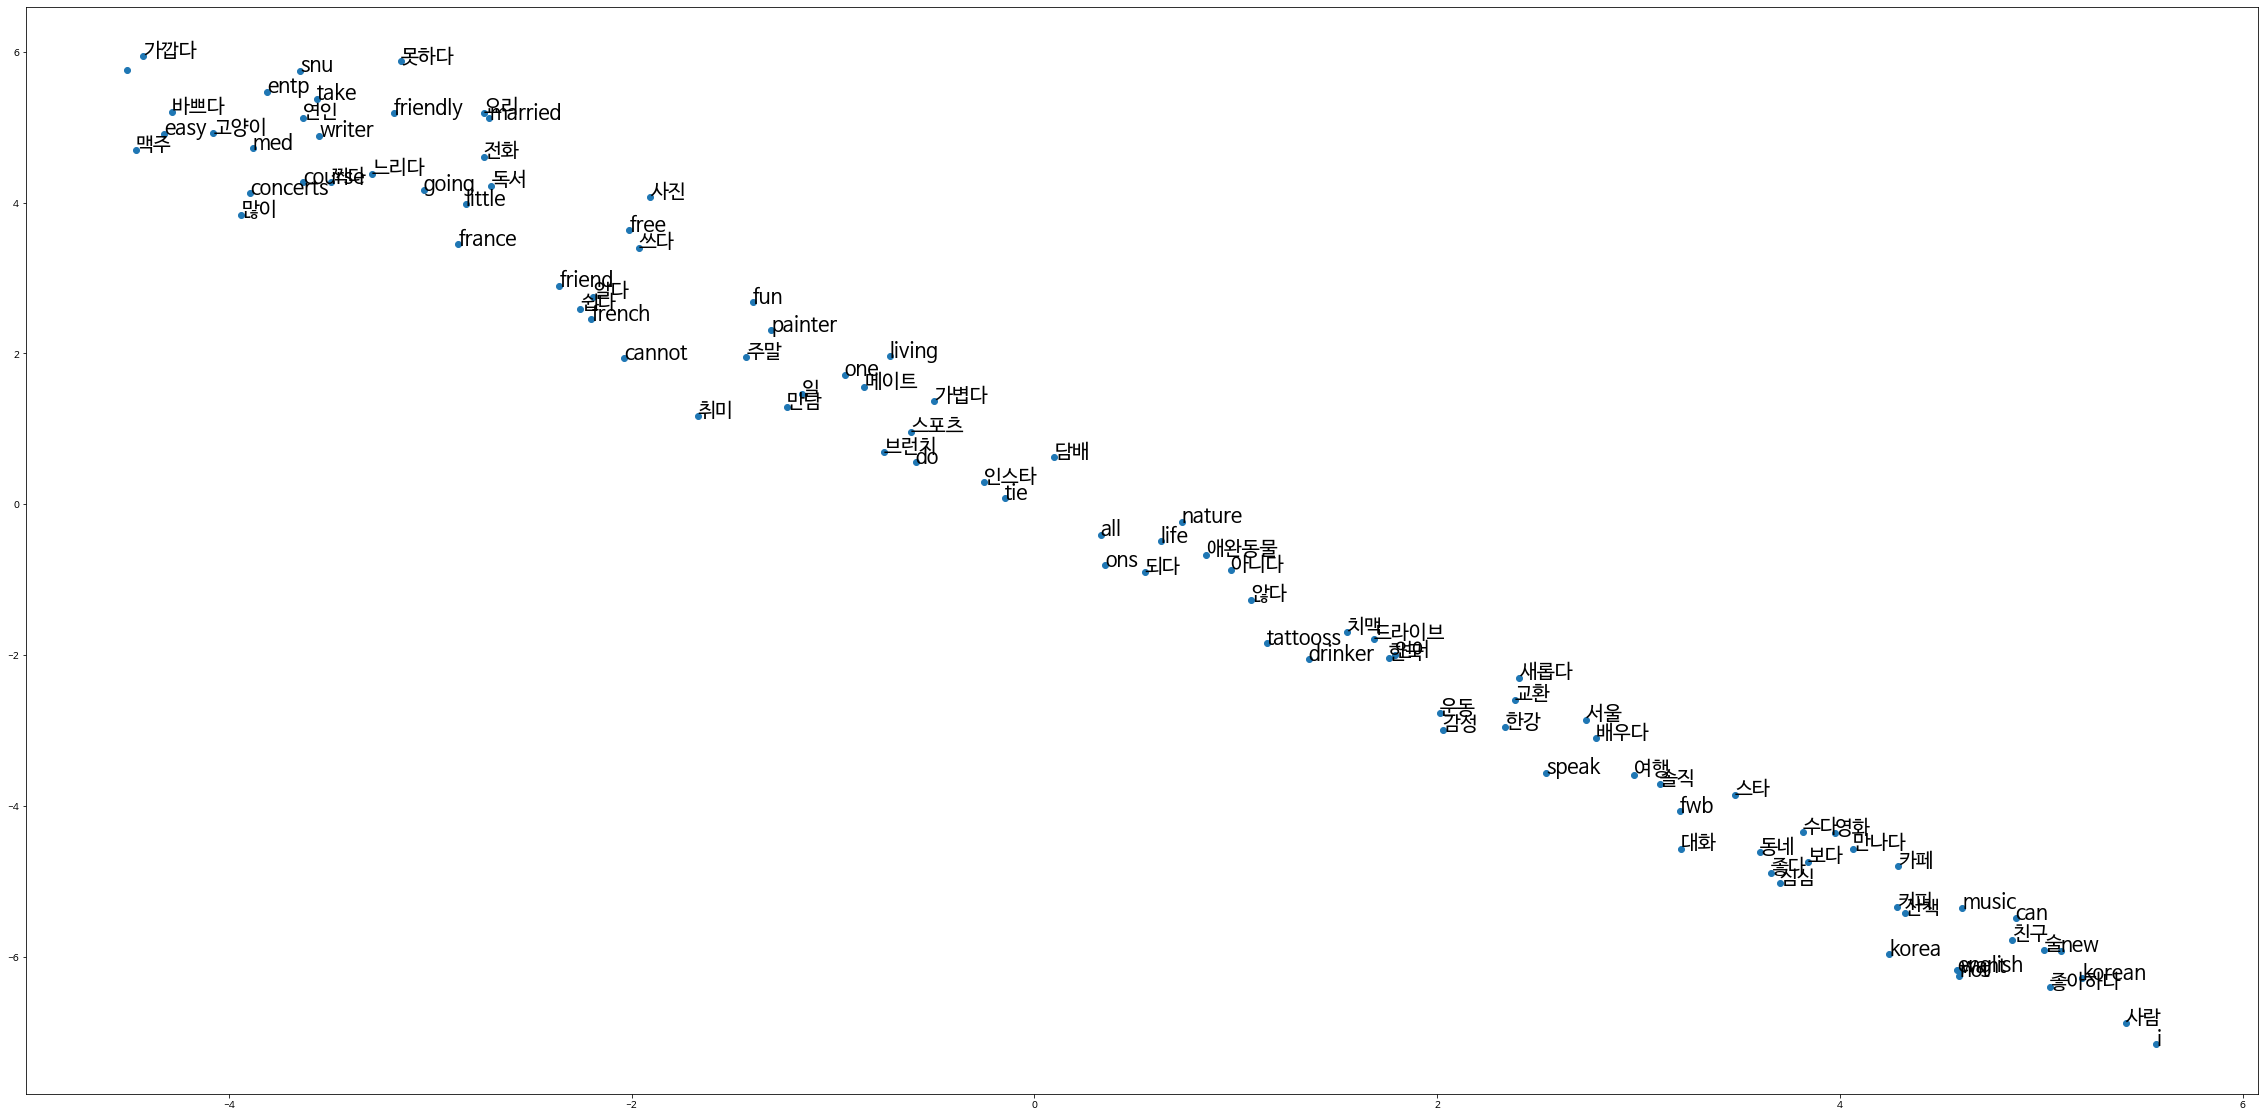

In [ ]:
w2v_df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
w2v_df.shape
w2v_df.head(10)

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(w2v_df['x'], w2v_df['y'])

for word, pos in w2v_df.iterrows():
    ax.annotate(word, pos, fontsize=20)
plt.show()